<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#0.-Preparation" data-toc-modified-id="0.-Preparation-0">0. Preparation</a></span><ul class="toc-item"><li><span><a href="#0.1-Install-/-Load-Packages" data-toc-modified-id="0.1-Install-/-Load-Packages-0.1">0.1 Install / Load Packages</a></span></li></ul></li><li><span><a href="#2.-Quantum-algorithms" data-toc-modified-id="2.-Quantum-algorithms-1">2. Quantum algorithms</a></span><ul class="toc-item"><li><span><a href="#2.0-A-list-of-quanum-protocols-and-quantum-algorithms" data-toc-modified-id="2.0-A-list-of-quanum-protocols-and-quantum-algorithms-1.1">2.0 A list of quanum protocols and quantum algorithms</a></span></li></ul></li><li><span><a href="#2.1-Quantum-Teleportation" data-toc-modified-id="2.1-Quantum-Teleportation-2">2.1 Quantum Teleportation</a></span><ul class="toc-item"><li><span><a href="#2.1.1-Procedure-of-the-Quantum-Teleportation" data-toc-modified-id="2.1.1-Procedure-of-the-Quantum-Teleportation-2.1">2.1.1 Procedure of the Quantum Teleportation</a></span></li><li><span><a href="#2.2.2-Quantum-circuit-of-Quantum-Teleportation" data-toc-modified-id="2.2.2-Quantum-circuit-of-Quantum-Teleportation-2.2">2.2.2 Quantum circuit of Quantum Teleportation</a></span></li></ul></li><li><span><a href="#2.2-Superdense-Coding" data-toc-modified-id="2.2-Superdense-Coding-3">2.2 Superdense Coding</a></span><ul class="toc-item"><li><span><a href="#2.2.1-Procedure-of-the-Superdense-Coding" data-toc-modified-id="2.2.1-Procedure-of-the-Superdense-Coding-3.1">2.2.1 Procedure of the Superdense Coding</a></span></li><li><span><a href="#2.2.2-Quantum-circuit-of-Superdense-Coding" data-toc-modified-id="2.2.2-Quantum-circuit-of-Superdense-Coding-3.2">2.2.2 Quantum circuit of Superdense Coding</a></span></li><li><span><a href="#Connecting-to-IBM-Q-device-(cloud-quantum-computer)" data-toc-modified-id="Connecting-to-IBM-Q-device-(cloud-quantum-computer)-3.3">Connecting to IBM Q device (cloud quantum computer)</a></span></li></ul></li></ul></div>

# 0. Preparation

## 0.1 Install / Load Packages
- We need to install or load packages before running the code below.

In [1]:
# Install packages

!pip install numpy
!pip install qiskit
!pip install qiskit[visualization]
!pip install matplotlib

In [2]:
# Load packages
## General tools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import pi

## Qiskit Circuit Functions
from qiskit import *
from qiskit.quantum_info import *
from qiskit.visualization import *

# 2. Quantum algorithms
 - Quantum circuits are composed of mainly 3 parts:
    - Initialization and reset: Set up the desiring initial quantum state and reset after the quantum circuit has been performed.
    - Quantum Gates: Applying a sequence of quantum gates that manipulates the initial quantum state.
    - Measurements: After the quantum gate operations, we measure each qubits and get the observable outcome.
 - Link: [Qiskit - Chap.3 Quantum Protocols and Quantum Algorithms](https://qiskit.org/textbook/ch-algorithms/index.html)

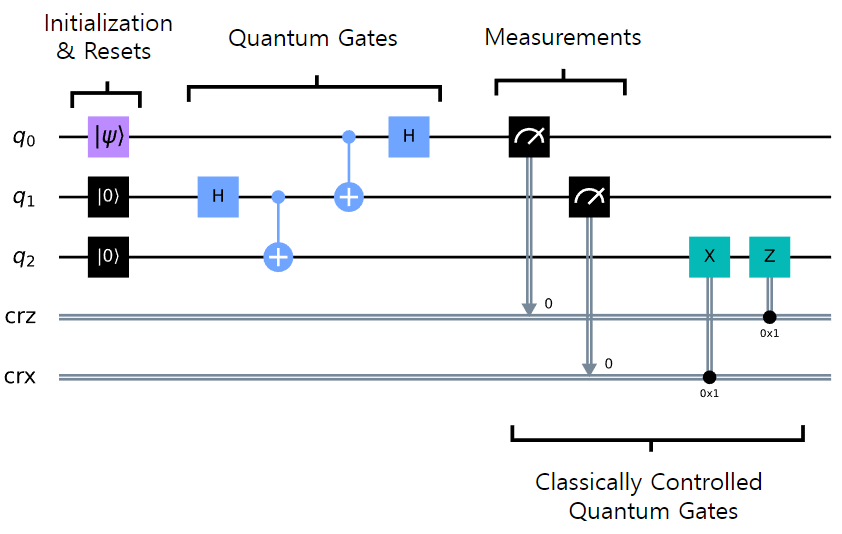



## 2.0 A list of quanum protocols and quantum algorithms
- Here are a list of  quanum protocols and quantum algorithms
    - Deutsch-Jozsa Algorithm
    - Bernstain-Vazirani Algoritm
    - Simon's Algorithm
    - Quantum Fourier Transform
    - Quantum Phase Estimation
    - Shor's Algorithm
    - Grover's Algorithm
    - Quantum Walk Search Algorithm
    - Quantum Teleportaion
    - Superdense Coding

# 2.1 Quantum Teleportation

- How many classical bits should be sent in order to communicate the state of a qubit, i.e., $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$?
- At first glance, since $\alpha, \beta \in \mathbb{C}$ with ${|\alpha|^2+|\beta|^2=1}$, it seems that infinitely many bits are required when considering infinite decimals of $\alpha$, and $\beta$.
- **Entanglement** allows for a quantum state to be sent by sending only 2 classical bits of information.
- Link: [Qiskit-Quantum Teleportation](https://qiskit.org/textbook/ch-algorithms/teleportation.html)

**1큐빗 정보를 2비트로 보내기**
1. 준비 : Bell State 한 큐빗씩 나눠가진다.
2. 전송 : Alice가 자신이 받은 큐빗과 다른 큐빗에 Bell 회로의 역연산 수행한 후 측정해서 보낸다.
3. 수령 : Bob은 자신이 받은 2비트의 정보에 따라 연산을 수행하면 Alice가 보내고 싶던 Quantum State를 얻을 수 있다.

## 2.1.1 Procedure of the Quantum Teleportation

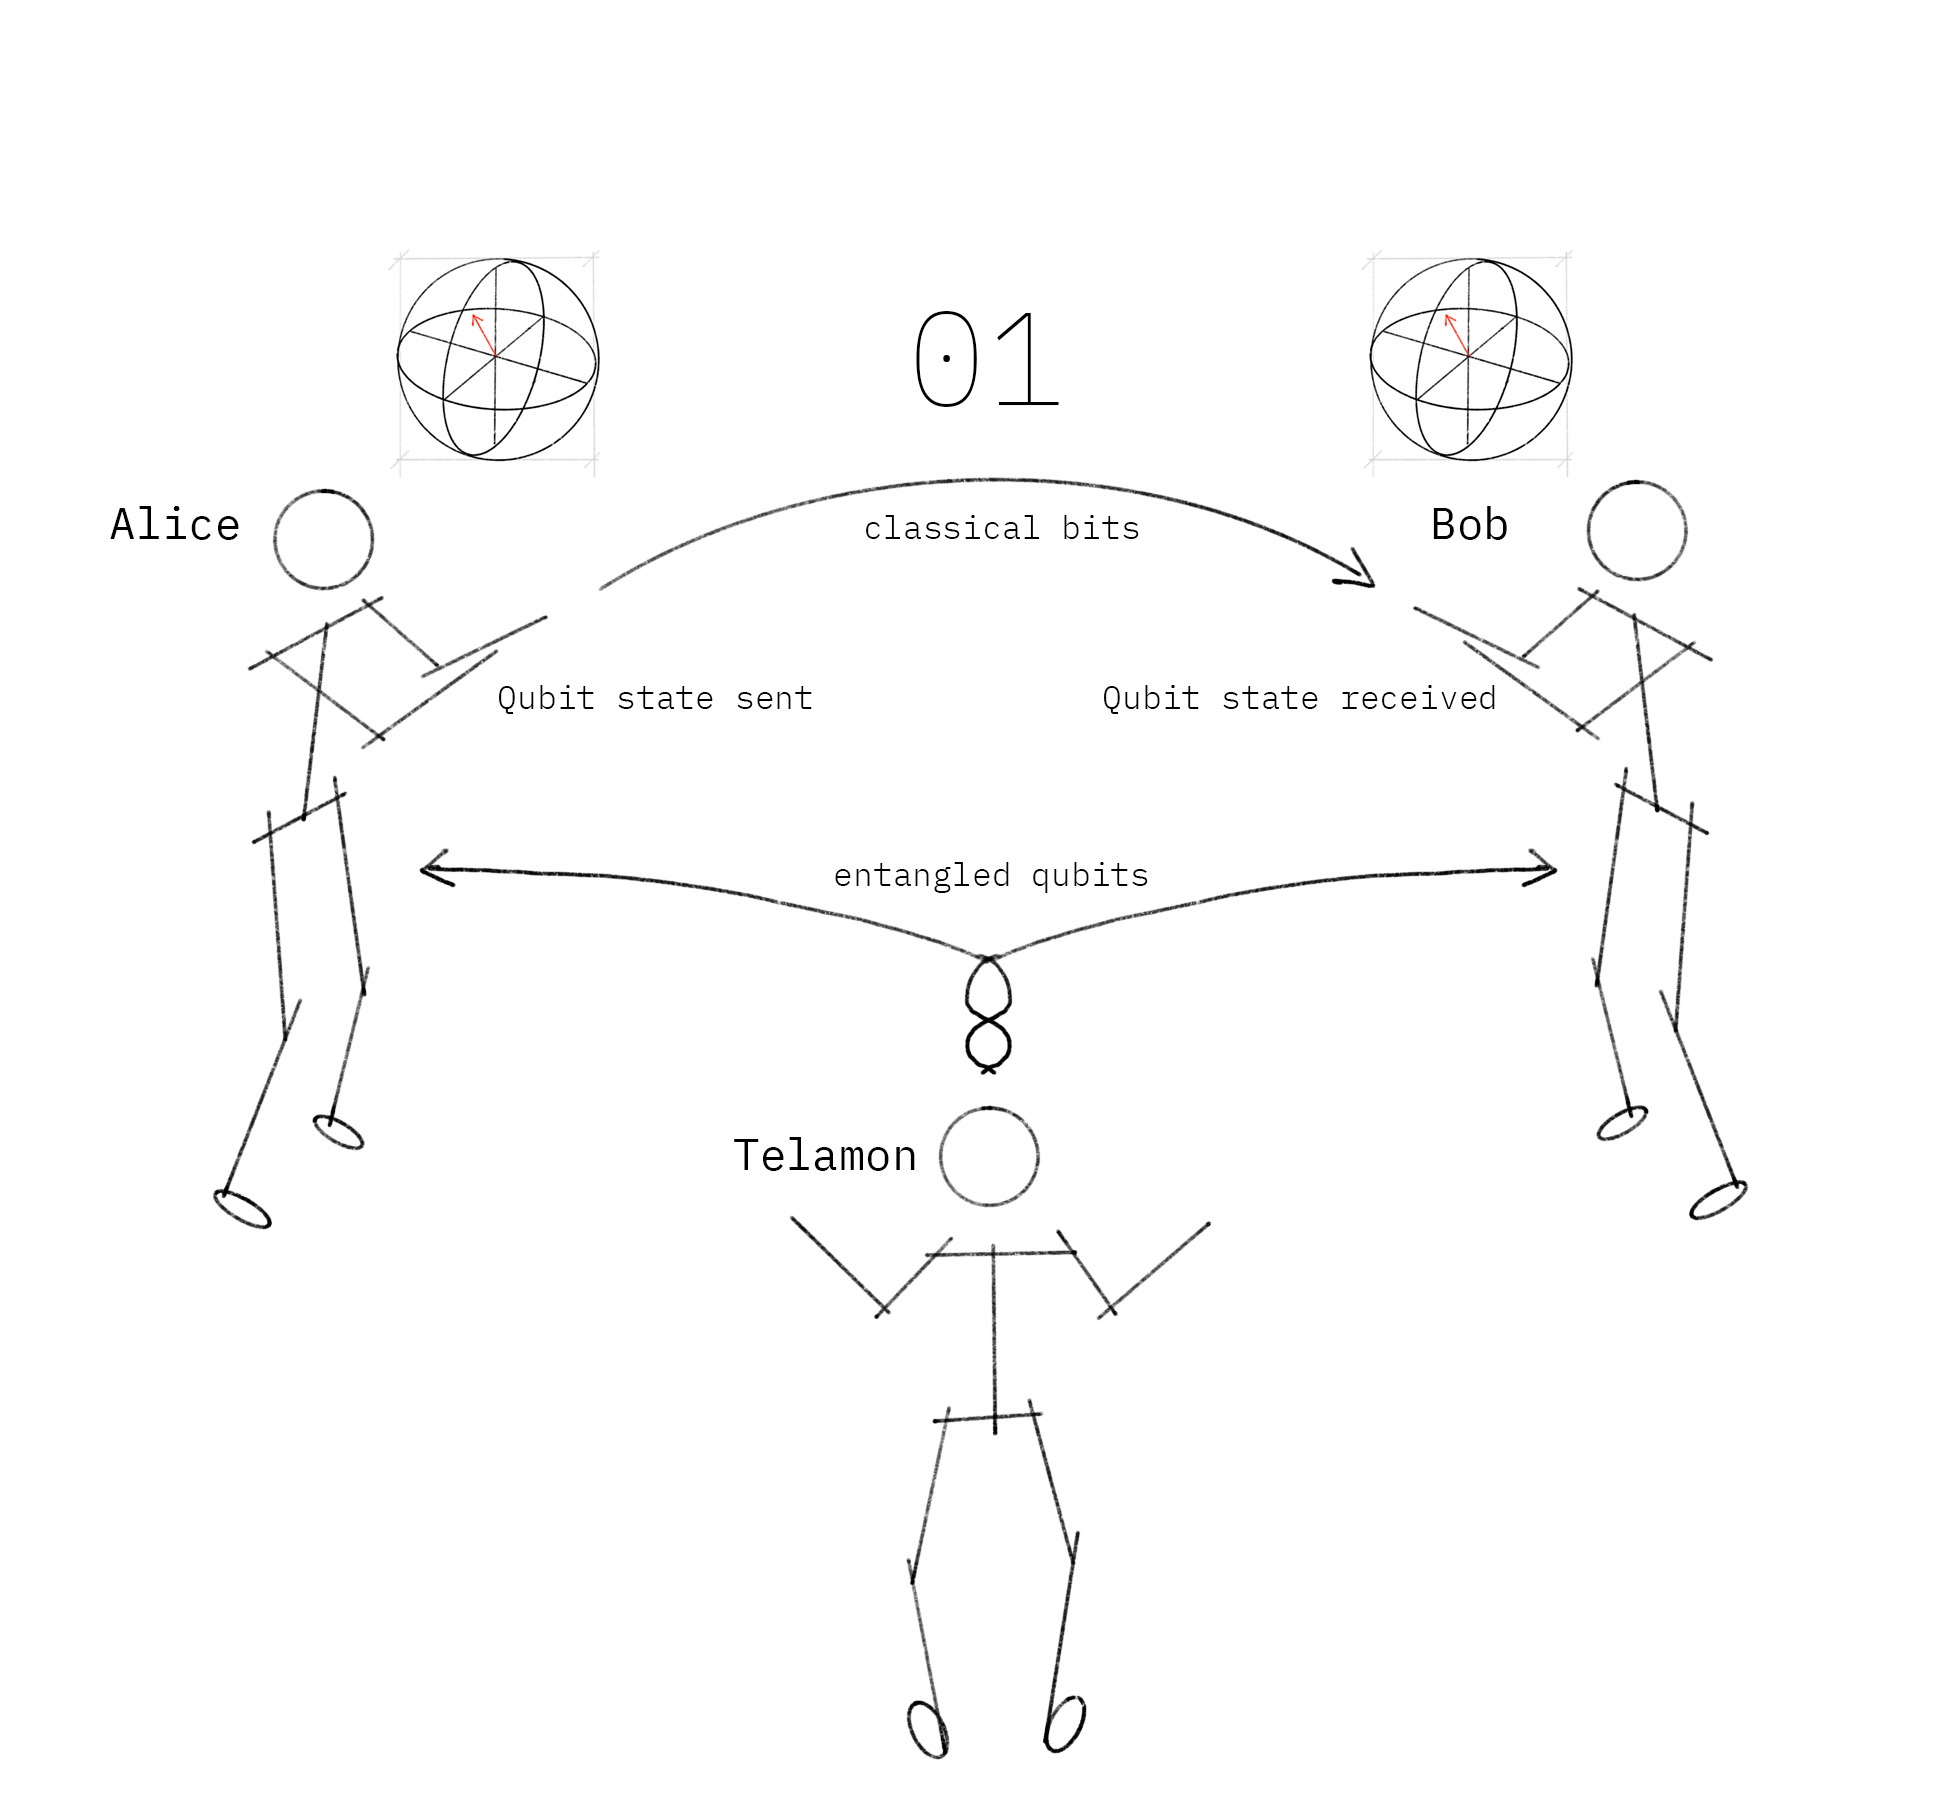

- To transfer a quantum bit, Alice and Bob must use a third party (Telamon) to send them an entangled qubit pair. Alice then performs some operations on her qubit, sends the results to Bob over a classical communication channel, and Bob then performs some operations on his end to receive Alice’s qubit.  Here, no qubits are actually 'sent', rather the information has been 'sent'.

- **Step 1**: A third party Telamon creates entangled state of two qubits known as the Bell pair, that is, $|q_1 q_2\rangle = \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$. This can be created using a H-gate and a CNOT-gate.
    - Let's say Alice owns $|q_1\rangle$ and Bob owns $|q_2\rangle$ after they part ways.

- **Step 2**: Alice applies a CNOT-gate to $q_1$, controlled by $|q_0\rangle$. Then, Alice applies a H-gate to $|q_0\rangle$.

- **Step 3**: Next, Alice applies a measurement to both qubits that she owns, ($q_0$ and $q_1$), and stores this result in two classical bits. She then sends these two bits to Bob.

- **Step 4**: Bob, who already has the qubit $q_2$, then applies the following gates depending on the state of the classical bits that Alice stores. Note that this transfer of information is purely classical.

| Alice's bits | Bob aapplies |
|:------------:|:------------:|
| 00           | $I$ gate     |
| 01           | $X$ gate     |
| 10           | $Z$ gate     |
| 11           | $ZX$ gate    |


- In summary, quantum teleportaion is a process by which the state of qubit can be transmitted from one location to another, using two bits of classical communication and a Bell pair.

## 2.2.2 Quantum circuit of Quantum Teleportation
- Let the $|q_0\rangle$ be the qubit that Alice sends to Bob, and let a two qubits of a third party be $|q_1 q_2\rangle$ where $|q_1\rangle$ goes to Alice and $|q_2\rangle$ goes to Bob. 
- Let's creat a quantum circuit of the Quantum Teleportaion.

In [3]:
def create_bell_pair(qc, a, b):
    # Creates a bell pair in qc using qubits a & b
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target

In [4]:
qr = QuantumRegister(3,'q')    # Protocol uses 3 qubits
cr1 = ClassicalRegister(1) # and 2 classical bits
cr2 = ClassicalRegister(1) # in 2 different registers
teleportation = QuantumCircuit(qr, cr1, cr2)

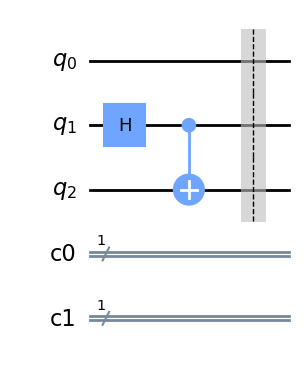

In [5]:
## STEP 1
# Entangle qubits q1 and q2
create_bell_pair(teleportation, 1, 2)
teleportation.barrier()

# And view the circuit so far:
teleportation.draw(output='mpl')

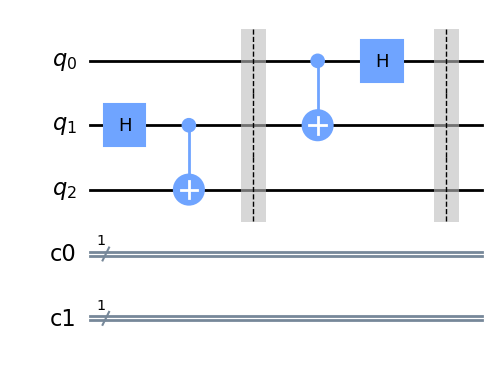

In [6]:
## STEP 2
# Alice performs her gates
teleportation.cx(0,1)
teleportation.h(0)
teleportation.barrier()

# And view the circuit so far:
teleportation.draw(output='mpl')

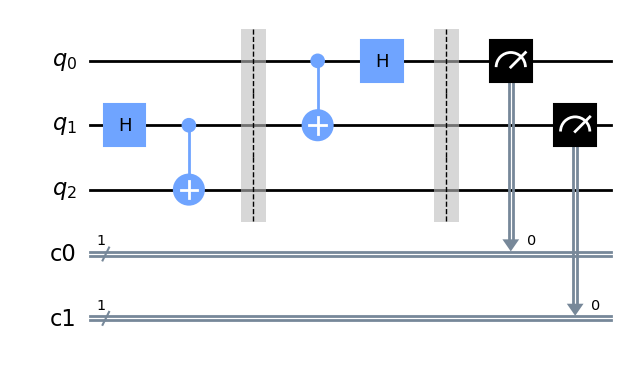

In [7]:
## STEP 3
# Alice measures his part
teleportation.measure(0,0)
teleportation.measure(1,1)

# And view the circuit so far:
teleportation.draw(output='mpl')

In [8]:
# This function takes a QuantumCircuit (qc), qubit index
# and ClassicalRegisters (cr1 & cr2) to decide which gates to apply
def bob_recover(qc, index, cr1, cr2):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.z(index).c_if(cr1, 1) # Apply gates if the registers 
    qc.x(index).c_if(cr2, 1) # are in the state '1'

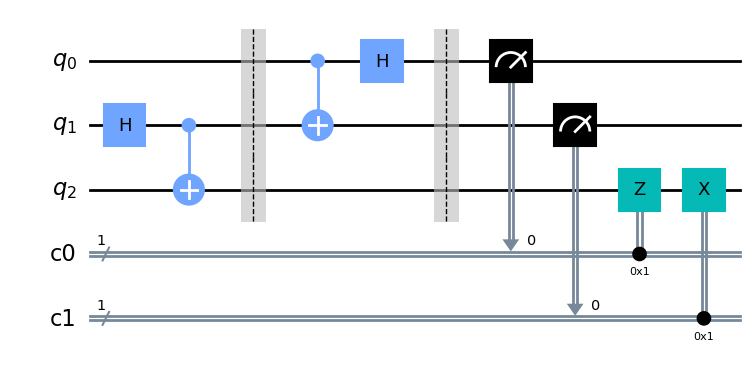

In [9]:
## STEP 4
# Bob perform recovery
bob_recover(teleportation, 2, cr1, cr2)

# And view the circuit so far:
teleportation.draw(output='mpl')

-  Let's test Quantum Teleportation with a random state!

In [10]:
def random_init(qc,r1,r2,index):
    
    ## STEP 0
    # Alice prepares a quantum state to teleport
    # by applying a random rotation around y and z
    qc.ry(r1,index)
    qc.rz(r2,index)
    qc.barrier()

In [11]:
def quantum_teleportation(qc):
    
    ## STEP 1
    # Entangle qubits q1 and q2
    create_bell_pair(qc, 1, 2)
    qc.barrier()

    ## STEP 2
    # Alice performs his gates
    qc.cx(0,1)
    qc.h(0)
    qc.barrier()

    ## STEP 3
    # Alice measures his part
    qc.measure(0,0)
    qc.measure(1,1)

    ## STEP 4
    # Bob perform recovery
    bob_recover(qc, 2, cr1, cr2)

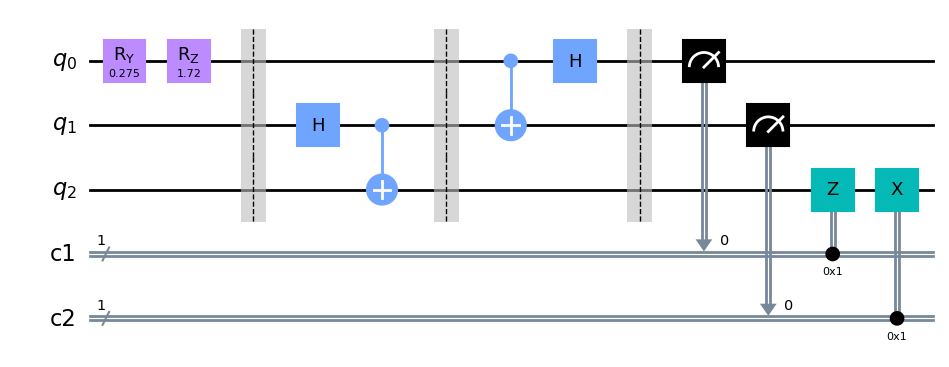

In [12]:
qr = QuantumRegister(3,'q')    # Protocol uses 3 qubits
cr1 = ClassicalRegister(1,'c1') # and 2 classical bits
cr2 = ClassicalRegister(1,'c2') # in 2 different registers
qc_teleportation = QuantumCircuit(qr, cr1, cr2)
qc_ref = QuantumCircuit(qr)

r1 = np.random.random()*np.pi
r2 = np.random.random()*2*np.pi

random_init(qc_ref, r1, r2, 0)

random_init(qc_teleportation, r1, r2, 0)

quantum_teleportation(qc_teleportation)

qc_teleportation.draw(output='mpl')

In [13]:
backend_sv = BasicAer.get_backend('statevector_simulator')

in_vector = execute(qc_ref, backend_sv).result().get_statevector()
out_vector = execute(qc_teleportation, backend_sv).result().get_statevector()

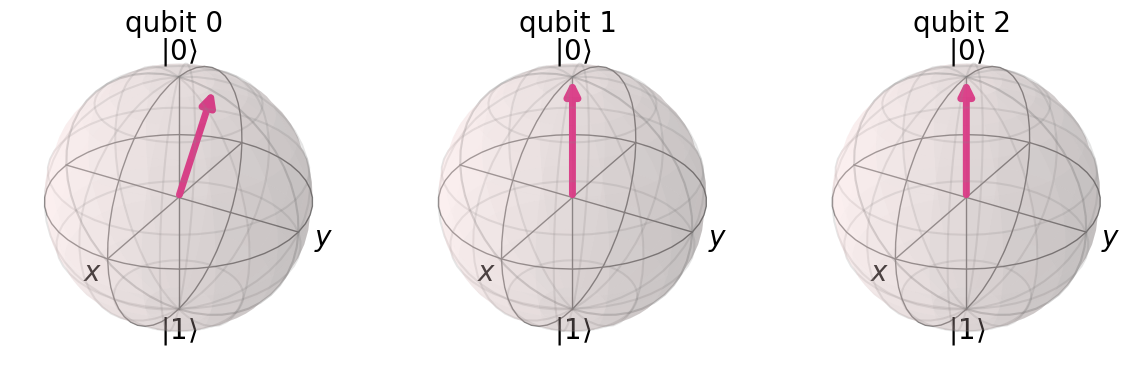

In [14]:
plot_bloch_multivector(in_vector)

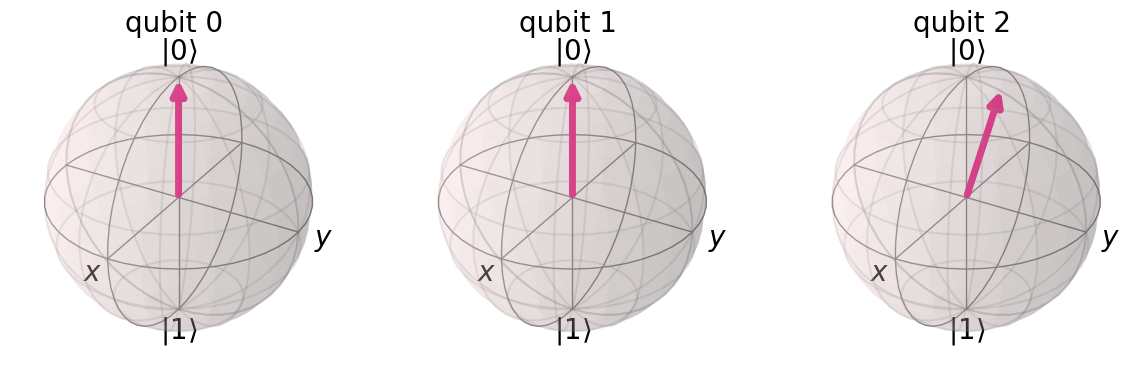

In [15]:
plot_bloch_multivector(out_vector)

# 2.2 Superdense Coding

- How many classical bits of information can be sent with a qubit?
- By sending a qubit in $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$, only one classical bit of information can be transmitted due to the quantum measurement postulate & no cloning theorem.
- **Entanglement** allows for 2 classical bits of information to be sent by sending only 1 qubit.
- Link: [Qiskit-Superdense Coding](https://qiskit.org/textbook/ch-algorithms/superdense-coding.html)

**2비트 정보를 1큐빗으로 전송**
1. 준비 : Bell State 한 큐빗씩 나눠가진다.
2. 전송 : Alice가 보내고 싶은 정보에 따라 연산을 적용한 후 보낸다.
3. 수령 : Bob이 받은 후 Bell 회로의 역연산을 수행하면 Alice가 보내고 싶은 정보를 받는다.

## 2.2.1 Procedure of the Superdense Coding

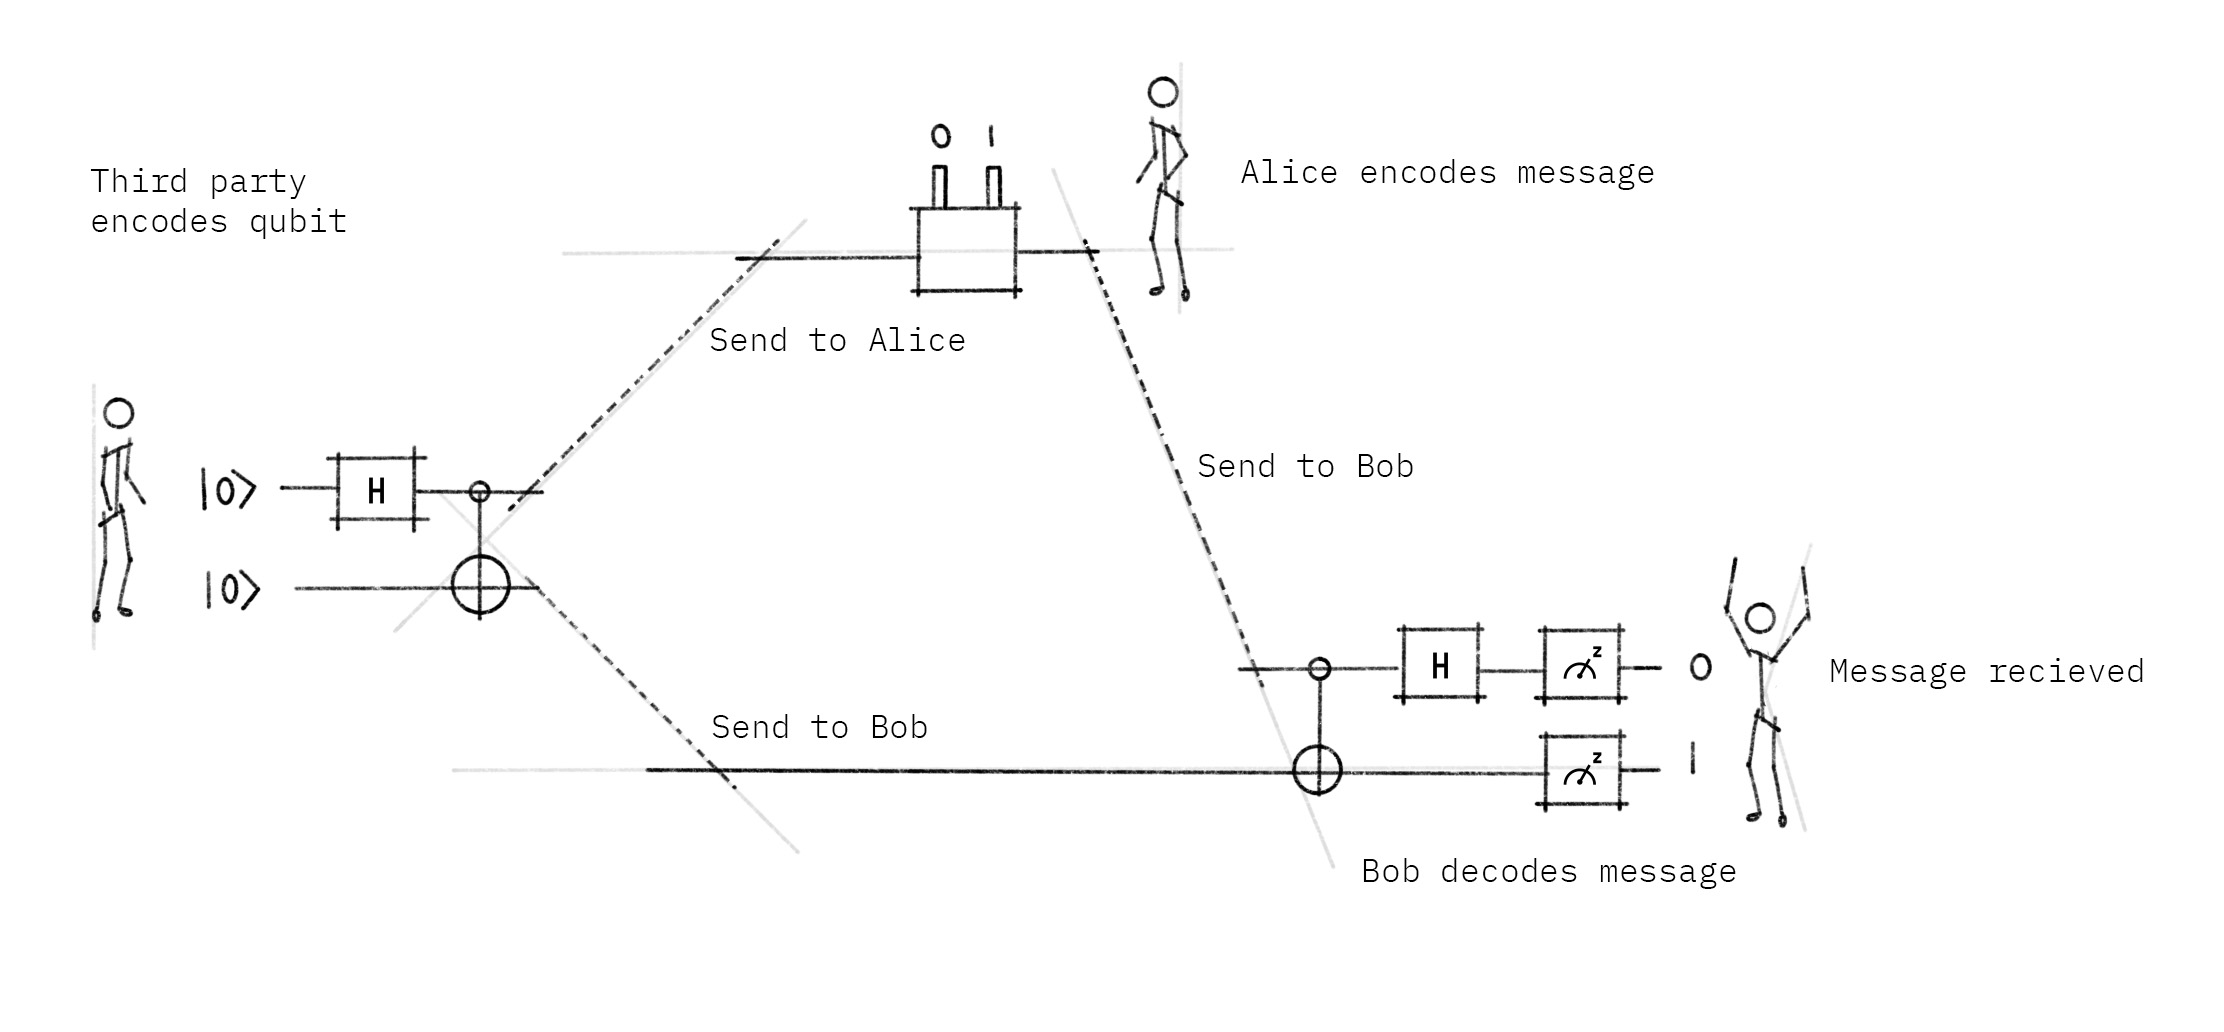


  $$ |\Phi^{+}\rangle = \frac{|00\rangle+|11\rangle}{\sqrt{2}}$$

  $$ |\Psi^{+}\rangle = \frac{|01\rangle+|10\rangle}{\sqrt{2}}$$

  $$ |\Phi^{-}\rangle = \frac{|00\rangle-|11\rangle}{\sqrt{2}}$$

  $$ |\Psi^{-}\rangle = \frac{|01\rangle-|10\rangle}{\sqrt{2}}$$
 

- **Step 1**: The process starts with a third party, who we'll call him Charlie, preparing two qubits entangled state known as the Bell pair, that is, $|q_0 q_1\rangle = \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$.
    - Let the two qubits of a third party be $|q_0 q_1\rangle$ where $|q_0\rangle$ goes to Alice and $|q_1\rangle$ goes to Bob.

- **Step 2**: Charlie sends the first qubit to Alice and the second qubit to Bob. **The goal of the protocol is for Alice to send 2 classical bits of information to Bob using her qubit.** But before she sends, she needs to apply a set fo quantum gates to her qubit depending on the 2 bits of information she wants to send.

- Encoding Rules for Superdense Coding (Alice protocol):

| Alice Wants to Send | Applied Gate | Resulting State($\cdot\frac{1}{\sqrt{2}}$)   |
|:------------------------:|:------------:|:--------------------------------------------:|
| 00                       | $I$          | ${\vert00\rangle + \vert11\rangle}$          |
| 01                       | $X$          | ${\vert10\rangle + \vert01\rangle}$          |
| 10                       | $Z$          | ${\vert00\rangle - \vert11\rangle}$          |
| 11                       | $ZX$         | ${\vert01\rangle - \vert10\rangle}$          |

- **Step 3**: Bob receives Alice's qubit (leftmost qubit) and uses his qubit to decode Alice's message. Notice that he does not need to have knowledge of the state in order to decode it — he simply uses the restoration operation. Bob applies a CNOT gate using Alice's qubit as control and his qubit as target. Then he applies a Hadamard gate and finally performs a measurement on both qubits to extract Alice's message.

| Bob receives($\cdot\frac{1}{\sqrt{2}}$)| After CNOT-gate($\cdot\frac{1}{\sqrt{2}}$)| After H-gate       |
|:--------------------------------------:|:-----------------------------------------:|:------------------:|
| ${\vert00\rangle + \vert11\rangle}$    | ${\vert00\rangle + \vert10\rangle}$       | ${\vert00\rangle}$ |
| ${\vert10\rangle + \vert01\rangle}$    | ${\vert11\rangle + \vert01\rangle}$       | ${\vert01\rangle}$ |
| ${\vert00\rangle - \vert11\rangle}$    | ${\vert00\rangle - \vert10\rangle}$       | ${\vert10\rangle}$ |
| ${\vert01\rangle - \vert10\rangle}$    | ${\vert01\rangle - \vert11\rangle}$       | ${\vert11\rangle}$ |

- In summary, Superdense coding is a procedure that allows someone to send two classical bits to another party using just a single qubit of communication.

## 2.2.2 Quantum circuit of Superdense Coding
- Let's creat a quantum circuit of the Superdense Coding Protocol.

In [16]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit.visualization import *
import numpy as np

In [17]:
## Encoding of the Superdense Coding

### Define a function that takes a QuantumCircuit (qc)
### a qubit index (index) and a message string (msg)
def encoding(qc, index, msg):
    if msg == 0:
        pass    # To send 00 we do nothing
    elif msg == 1:
        qc.x(index) # To send 01 we apply an X-gate
    elif msg == 2:
        qc.z(index) # To send 10 we apply a Z-gate
    elif msg == 3:
        qc.z(index) # To send 11, we apply a Z-gate
        qc.x(index) # followed by an X-gate
    else:
        print("Invalid Message. Sending '00'.")

In [18]:
## Decoding of the Superdense Coding
def decoding(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

In [19]:
## Define quantum circuit of the Superdense Coding

def qc_sdc(msg):

    # Create the quantum circuit with 2 qubits
    qc = QuantumCircuit(2)

    # First, an entangled pair is created between Alice and Bob
    # Alice has the first qubit, Bob has the second qubit.
    qc.h(0)
    qc.cx(0,1)

    qc.barrier()

    # Next, Alice encodes his message onto qubit 0.
    encoding(qc, 0, msg)
    qc.barrier()
    # Alice then sends his qubit to Bob.

    # After recieving qubit 0, Bob applies the recovery protocol:
    decoding(qc, 0, 1)

    # Finally, Bob measures her qubits to read Alice's message
    qc.measure_all()
    
    return qc

{'00': 1024}
0


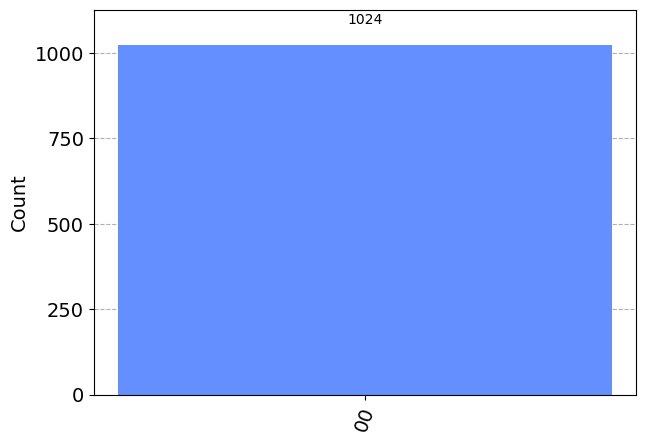

In [20]:
backend_qasm = Aer.get_backend('qasm_simulator')

rand_msg = np.random.randint(4)
qc = qc_sdc(rand_msg)
job_sim = execute(qc, backend_qasm, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
print(rand_msg)
plot_histogram(measurement_result)

The random message was: 0


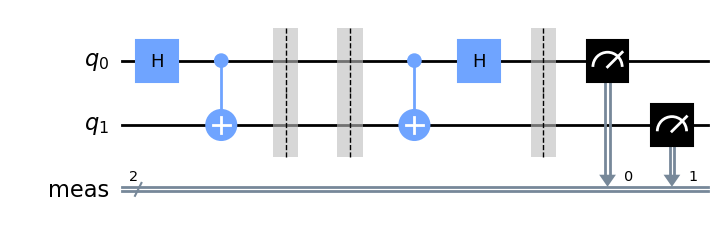

In [21]:
print("The random message was: %s" % rand_msg)
qc.draw(output='mpl')


## Connecting to IBM Q device (cloud quantum computer)
- In order to use the cloud quantum device, we need to have an account at 'IBM Quantum'
    - Link: [IBM Quantum](https://quantum-computing.ibm.com/)
- Also, check the list of available quantum devices, and its system status, the number of pending job, and etc.
    - Link: [Qiskit: Compute Resourses](https://quantum-computing.ibm.com/services/)
- Using the cloud quantum device may take a long time depending on the number of its pending jobs.

In [22]:
from qiskit.tools.monitor import backend_overview, backend_monitor, job_monitor
from qiskit.tools.visualization import plot_gate_map, plot_error_map

In [25]:
provider = IBMQ.enable_account('YOUR_TOKEN')

In [26]:
# Get the list of backends available
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [27]:
# Retrieve IBM Quantum device information
backend_overview()

ibm_geneva                   ibm_washington               ibm_perth
----------                   --------------               ---------
Num. Qubits:  27             Num. Qubits:  127            Num. Qubits:  7
Pending Jobs: 50             Pending Jobs: 18             Pending Jobs: 201
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      282.1          Avg. T1:      96.6           Avg. T1:      175.3
Avg. T2:      213.3          Avg. T2:      92.6           Avg. T2:      139.4



ibm_auckland                 ibm_cairo                    ibm_lagos
------------                 ---------                    ---------
Num. Qubits:  27             Num. Qubits:  27             Num. Qubits:  7
Pending Jobs: 5              Pending Jobs: 217            Pending Jobs: 4
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operation

In [28]:
# Run the superdense coding experiment on a 5-qubit device (try london)
job_sdc = execute(qc, backend=provider.get_backend('ibmq_quito'), shots=4096)
job_monitor(job_sdc)

Job Status: job has successfully run


The random message was: 0


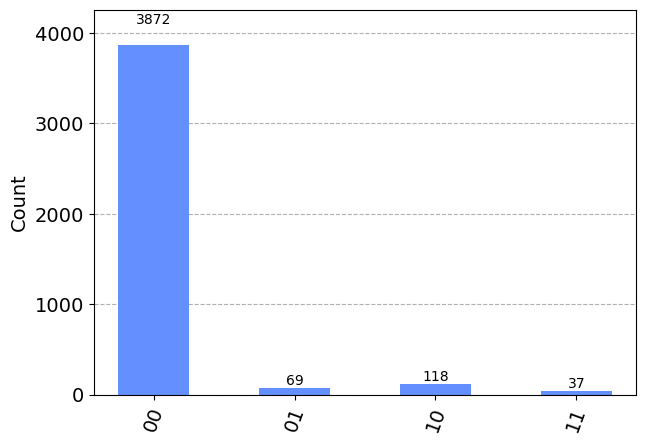

In [29]:
experiment_result = job_sdc.result().get_counts(qc)
print("The random message was: %s" % rand_msg)
plot_histogram(experiment_result)